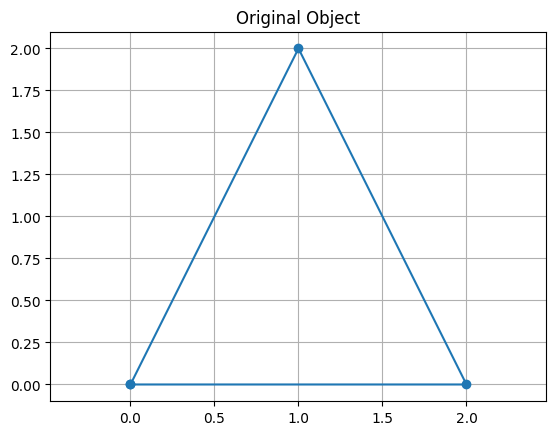

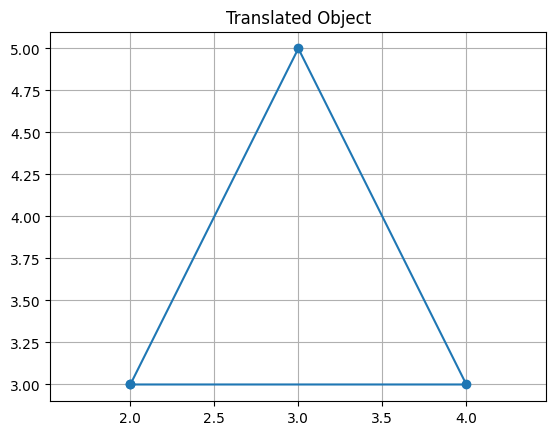

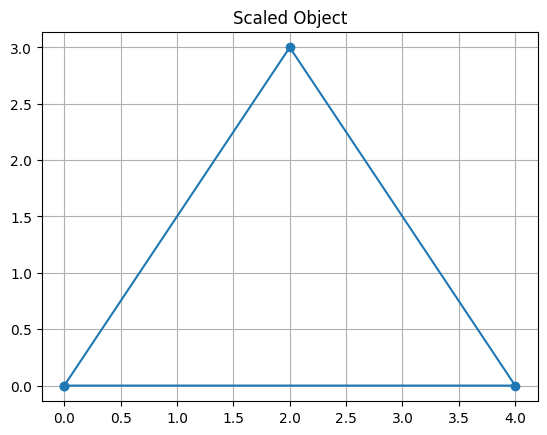

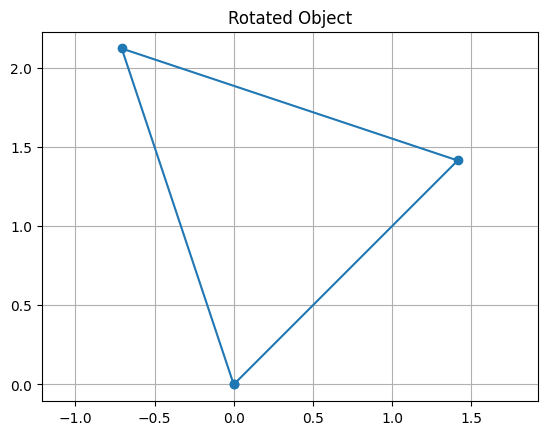

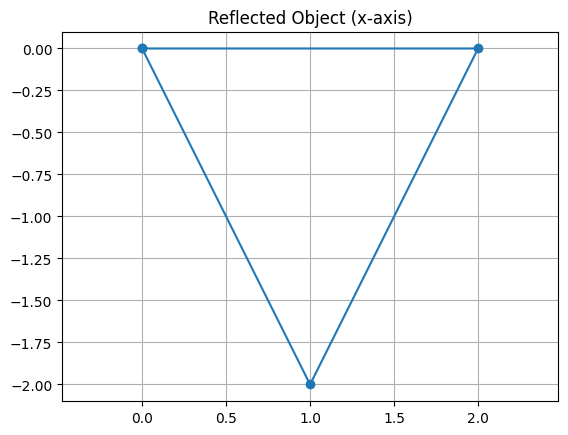

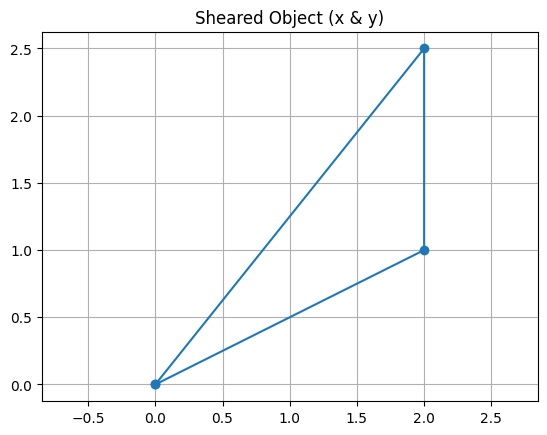

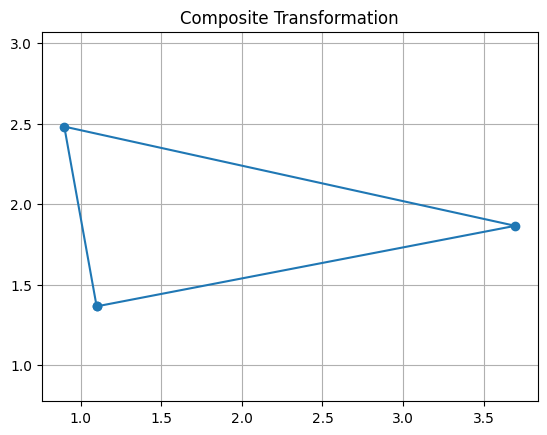

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot a 2D object
def plot_object(points, title="2D Object"):
    points = np.append(points, points[:, [0]], axis=1)  # Close the shape
    plt.plot(points[0], points[1], marker="o")
    plt.title(title)
    plt.axis("equal")
    plt.grid()
    plt.show()

# Transformation functions
def translate(points, tx, ty):
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return T @ points

def scale(points, sx, sy):
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    return S @ points

def rotate(points, angle):
    rad = np.deg2rad(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad),  np.cos(rad), 0],
                  [0,           0,           1]])
    return R @ points

def reflect(points, axis):
    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0],
                      [0, 1, 0],
                      [0, 0, 1]])
    elif axis == 'origin':
        R = np.array([[-1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'origin'.")
    return R @ points

def shear(points, shx=0, shy=0):
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0,  0, 1]])
    return Sh @ points

# Composite transformation
def composite_transform(points, transforms):
    result = points
    for transform in transforms:
        result = transform(result)
    return result

# Example 2D object (triangle)
points = np.array([[0, 1, 2], [0, 2, 0], [1, 1, 1]])

# Plot original object
plot_object(points[:2], title="Original Object")

# Apply transformations
translated = translate(points, tx=2, ty=3)
plot_object(translated[:2], title="Translated Object")

scaled = scale(points, sx=2, sy=1.5)
plot_object(scaled[:2], title="Scaled Object")

rotated = rotate(points, angle=45)
plot_object(rotated[:2], title="Rotated Object")

reflected = reflect(points, axis='x')
plot_object(reflected[:2], title="Reflected Object (x-axis)")

sheared = shear(points, shx=0.5, shy=0.5)
plot_object(sheared[:2], title="Sheared Object (x & y)")

# Composite transformation
composite = composite_transform(points, [
    lambda p: translate(p, 2, 2),
    lambda p: rotate(p, 30),
    lambda p: scale(p, 1.5, 0.5)
])
plot_object(composite[:2], title="Composite Transformation")


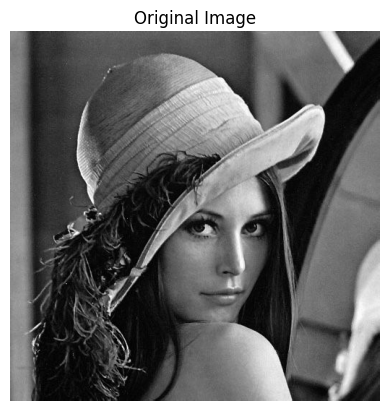

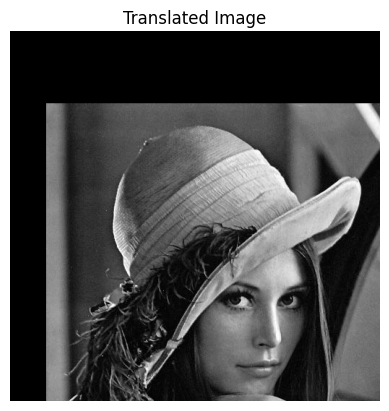

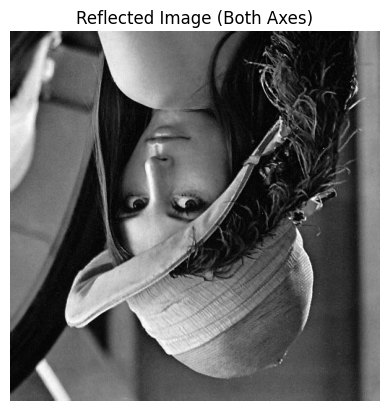

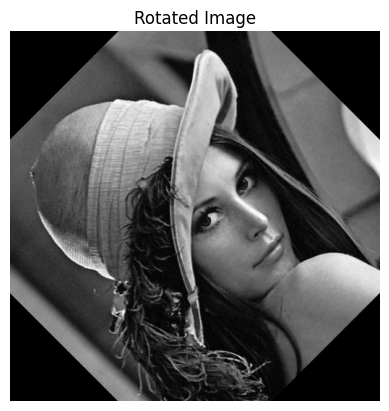

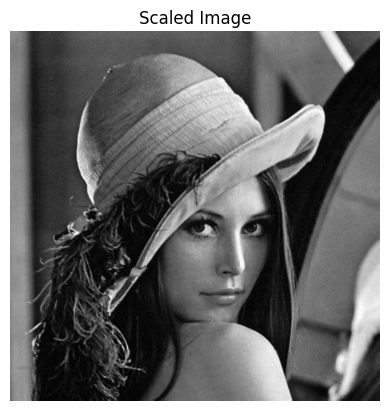

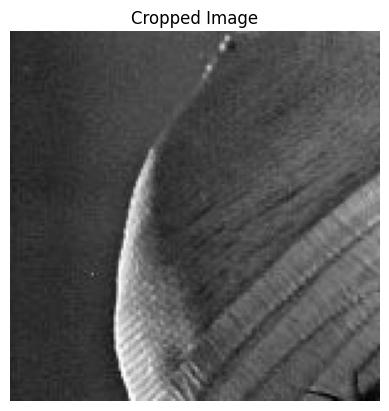

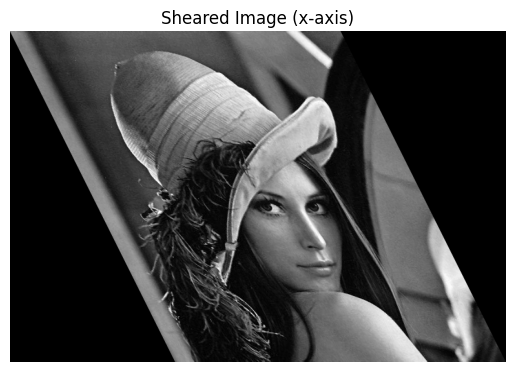

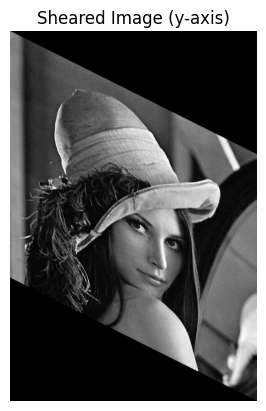

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display grayscale images
def plot_image(img, title="Image"):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load the grayscale image (set flag to 0 for grayscale)
image_path = "/content/sample_data/b&w image.jpg"  # Replace with the path to your image
image = cv2.imread(image_path, 0)
plot_image(image, title="Original Image")

# Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape
    T = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, T, (cols, rows))

translated = translate_image(image, tx=50, ty=100)
plot_image(translated, title="Translated Image")

# Reflection
def reflect_image(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)  # Flip vertically
    elif axis == 'y':
        return cv2.flip(img, 1)  # Flip horizontally
    elif axis == 'xy':
        return cv2.flip(img, -1)  # Flip both axes

reflected = reflect_image(image, axis='xy')
plot_image(reflected, title="Reflected Image (Both Axes)")

# Rotation
def rotate_image(img, angle):
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, M, (cols, rows))

rotated = rotate_image(image, 45)
plot_image(rotated, title="Rotated Image")

# Scaling
def scale_image(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled = scale_image(image, fx=1.5, fy=1.5)
plot_image(scaled, title="Scaled Image")

# Cropping
def crop_image(img, x1, y1, x2, y2):
    return img[y1:y2, x1:x2]

cropped = crop_image(image, 50, 50, 200, 200)
plot_image(cropped, title="Cropped Image")

# Shearing
def shear_image(img, shx=0, shy=0):
    rows, cols = img.shape
    M = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(img, M, (cols + int(abs(shx) * rows), rows + int(abs(shy) * cols)))

sheared_x = shear_image(image, shx=0.5, shy=0)
plot_image(sheared_x, title="Sheared Image (x-axis)")

sheared_y = shear_image(image, shx=0, shy=0.5)
plot_image(sheared_y, title="Sheared Image (y-axis)")
